In [161]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [162]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [163]:
def rho_red_light(x,rho_max):
    rho = rho_max * numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] = 0.5 * rho_max
    return rho

In [164]:
nx = 81
L = 4.0
dx = L / (nx-1)
nt = 40
rho_max = 10.0
u_max = 1.0

x = numpy.linspace(0.0, L, num=nx)

rho0 = rho_red_light(x, rho_max)

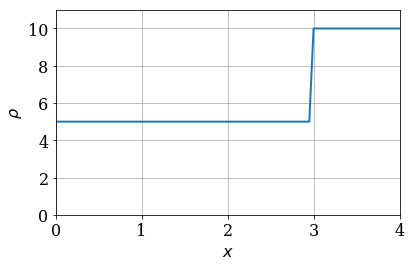

In [165]:
fig = pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0,L)
pyplot.ylim(0.0, 11.0);
pyplot.tight_layout()

In [166]:
def flux(rho, u_max, rho_max):
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [167]:
from matplotlib import animation
from IPython.display import HTML

In [168]:
def update_plot(n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [169]:
def lax_friedrichs(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) - dt / (2.0 * dx) * (F[2:] - F[:-2]))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [170]:
sigma = 1
dt = sigma * dx / u_max
rho_hist = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [171]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

In [172]:
sigma = 0.5
dt = sigma * dx / u_max
rho_hist = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [173]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

In [174]:
def jacobian(rho, u_max, rho_max):
    J = u_max * (1.0 - 2.0 * rho / rho_max)
    return J

In [175]:
def lax_wendroff(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        J = jacobian(rho, *args)
        rho[1:-1] = (rho[1:-1] - dt / (2.0 * dx) * (F[2:] - F[:-2]) + dt**2 / (4.0 * dx**2) *
                     ((J[1:-1] + J[2:]) * (F[2:] - F[1:-1]) - (J[:-2] + J[1:-1]) * (F[1:-1] - F[:-2])))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [176]:
sigma = 1.0
dt = sigma * dx / u_max

rho_hist = lax_wendroff(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [177]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

In [178]:
sigma = 0.5
dt = sigma * dx / u_max

rho_hist = lax_wendroff(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [179]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

In [180]:
def maccormack(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    rho_star = rho.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho_star[1:-1] = (rho[1:-1] - dt / dx * (F[2:] - F[1:-1]))
        F = flux(rho_star, *args)
        rho[1:-1] = 0.5 * (rho[1:-1] + rho_star[1:-1] - dt / dx * (F[1:-1] - F[:-2]))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [181]:
sigma = 1.0
dt = sigma * dx / u_max

rho_hist = maccormack(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [182]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

In [183]:
sigma = 0.5
dt = sigma * dx / u_max

rho_hist = maccormack(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [184]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

In [185]:
def maccormack_reverse(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    rho_star = rho.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho_star[1:-1] = 0.5 * (rho[1:-1] + rho_star[1:-1] - dt / dx * (F[1:-1] - F[:-2]))
        F = flux(rho_star, *args)
        rho[1:-1] = (rho[1:-1] - dt / dx * (F[2:] - F[1:-1]))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [186]:
sigma = 1.0
dt = sigma * dx / u_max

rho_hist = maccormack_reverse(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [187]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

CHALLENGE TASK BELOW

In [195]:
def rho_red_light_challenge(x,rho_max):
    rho = rho_max * numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] = 0.25 * rho_max
    return rho

In [196]:
rho0 = rho_red_light_challenge(x, rho_max)

In [197]:
sigma = 1
dt = sigma * dx / u_max
rho_hist = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [198]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

In [199]:
rho_hist = lax_wendroff(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [200]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

In [201]:
rho_hist = maccormack(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

Lax-Friedrichs, Lax-Wendroff, and MacCormack respond well to the negative wave speed. The velocity of the shock greatly decreases which makes sense if there are less cars on the road, the traffic build-up will take longer.